In [31]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

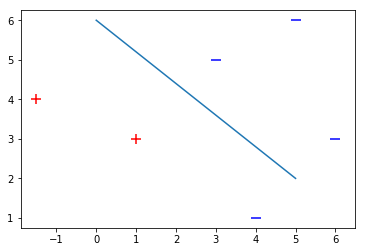

In [50]:
X = np.array([
        [-1.5, 4, -1],
        [1, 3, -1],
        [4, 1, -1],
        [3, 5, -1],
        [5, 6, -1],
        [6, 3, -1]
        ])

y = np.array([-1,-1,-1,1,1,1])

for i, sample in enumerate(X):
    
    if i < 2:
        plt.scatter(sample[0], sample[1], marker='+', s=120, c='r')
    
    else:
        plt.scatter(sample[0], sample[1], marker='_', s=120, c='b')

plt.plot([0,5],[6,2])

In [51]:
def svm_gd(X,y):
    
    w = np.zeros(3)
    eta = 1
    epochs = 1000000
    errors = []
    
    for epoch in range(1,epochs):
        error = 0
        
        for i,x in enumerate(X):
            if (y[i] * np.dot(X[i], w)) < 1:
                w = w + eta * ((y[i] * X[i]) + (-2 * (1/epoch) * w))
                error = 1
            else:
                w = w + eta * (-2 * (1/epoch) * w)
        
        errors.append(error)
    
    plt.plot(errors, '|')
    plt.ylim(-0.5,1.5)
    
    return w

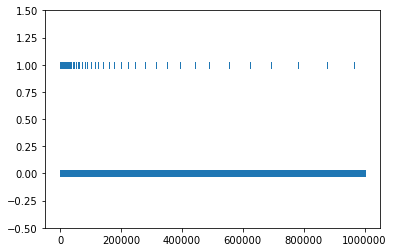

In [52]:
weight = svm_gd(X,y)

In [53]:
weight

array([  2.91092987,   3.22162823,  17.87374367])

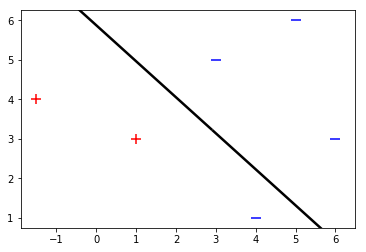

In [54]:
for i, sample in enumerate(X):
    
    if i < 2:
        plt.scatter(sample[0], sample[1], marker='+', s=120, c='r')
    
    else:
        plt.scatter(sample[0], sample[1], marker='_', s=120, c='b')
        
        
x2 = np.array([weight[0], weight[1], -weight[1], weight[0]])
x3 = np.array([weight[0], weight[1], weight[1], -weight[0]])

x2x3 = np.array([x2,x3])

X,Y,U,V = zip(*x2x3)

axes = plt.gca()

axes.quiver(X,Y,U,V, scale=1)